In [ ]:
"""
Simple first round EDA:

1. Most common words
2. Size of vocabulary
3. (??)

"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

## 1. Load data
Use lemmatized transcript and document-term matrix (dtm).

In [2]:
speech_df = pd.read_pickle('../dump/speech_clean_lemma')
data = pd.read_pickle('../dump/data_dtm_lemma.pkl')
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
aa,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
aahhhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abalthus,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Most common words

In [3]:
# Find the top 30 words said in each speech
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

# top_dict

In [4]:
# Find the most common top words among all speeches

# Let's first pull out the top 30 words for each speech
words = []
for speech in data.columns:
    top = [word for (word, count) in top_dict[speech]]
    for t in top:
        words.append(t)
        
boring_words = ['say','like','just','dont','don','im',
                'ive','youll','youve','things','thing','youre','right','really','lot',
                'make','know','people','way',
                'come','thats','graduate']

In [5]:
most_common = pd.DataFrame(Counter([word for word in words if word not in boring_words]).most_common()[:20],
                          columns=['word','freq'])
most_common

,word,freq
0,life,298
1,time,281
2,think,257
3,world,234
4,want,221
5,years,216
6,work,206
7,live,182
8,tell,177
9,today,157


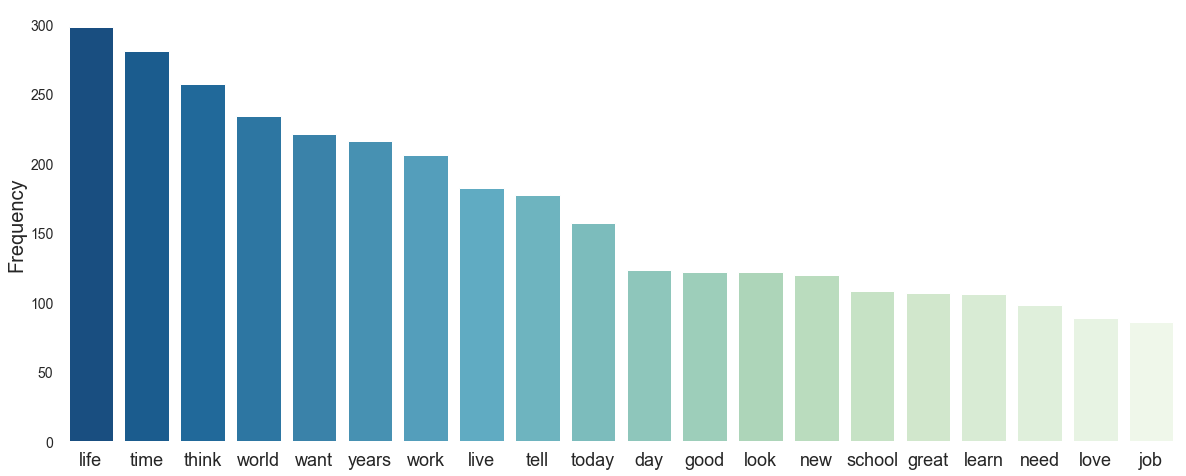

In [21]:
# Barplot
sns.set_style('white')
p = sns.color_palette("GnBu_r",20)
sns.set_palette(p)

fig, ax = plt.subplots(figsize=[20,8])
sns.barplot(x='word',y='freq',data=most_common)
# ax.set_title('Most commonly used words among all addresses',fontsize=20)
ax.set_ylabel('Frequency',fontsize=20)
ax.set_xlabel('',fontsize=30)
plt.box(on=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14);

fig.savefig('../plot/most_common_words.pdf', bbox_inches='tight', transparent=True)

In [7]:
# Pickle the list of common words
# Can add to stop_words for topic modeling
# If more than half of the speeches have it as a top word, exclude it from the list
common_words = [word for word, count in Counter(words).most_common() if count > 70]
common_words

['make',
 'life',
 'time',
 'people',
 'think',
 'world',
 'want',
 'years',
 'come',
 'work',
 'live',
 'tell',
 'way',
 'today',
 'things',
 'day',
 'good',
 'look',
 'new',
 'right',
 'graduate',
 'school',
 'great',
 'learn',
 'need',
 'thats',
 'love',
 'job',
 'college',
 'mean',
 'class',
 'ask',
 'thing']

In [121]:
# import pickle

# with open("../dump/common_words.txt", "wb") as f:   #Pickling
#     pickle.dump(common_words, f)

## 3. Size of vocabulary

In [100]:
def vocab(string):
    """
    Define size of vocabulary as unique words used/ total words of the speech.
    
    """
    vocab = set (string.split(' '))
    return round(len(vocab)/len(string),3)

In [101]:
speech_df['vocab'] = speech_df['transcript'].apply(vocab)
speech_df

,speaker,year,transcript,length,vocab
0,SIDDHARTHA MUKHERJEE,2018,i wish someone have tell me at my own commence...,14487,0.055
1,ABBY WAMBACK,2018,failure be not something to be ashamed of its ...,15866,0.053
2,JON B. FISHER,2018,thank you very much my father commencement spe...,8544,0.070
3,MINDY KALING,2018,good morning to the class of the faculty the p...,15391,0.057
4,JESMYN WARD,2018,persist be patient be well good morning it be ...,14063,0.056
...,...,...,...,...,...
436,CARRIE CHAPMAN,1936,i bring a message to sweet briar college and e...,22942,0.051
437,FRANKLIN D ROOSEVELT,1932,for me as for you this be a day of honorable a...,16017,0.056
438,OPRAH WINFREY,1918,thank you wallis annenberg and a special thank...,15301,0.053
439,RALPH WALDO,1838,in this refulgent summer it have be a luxury t...,40403,0.044


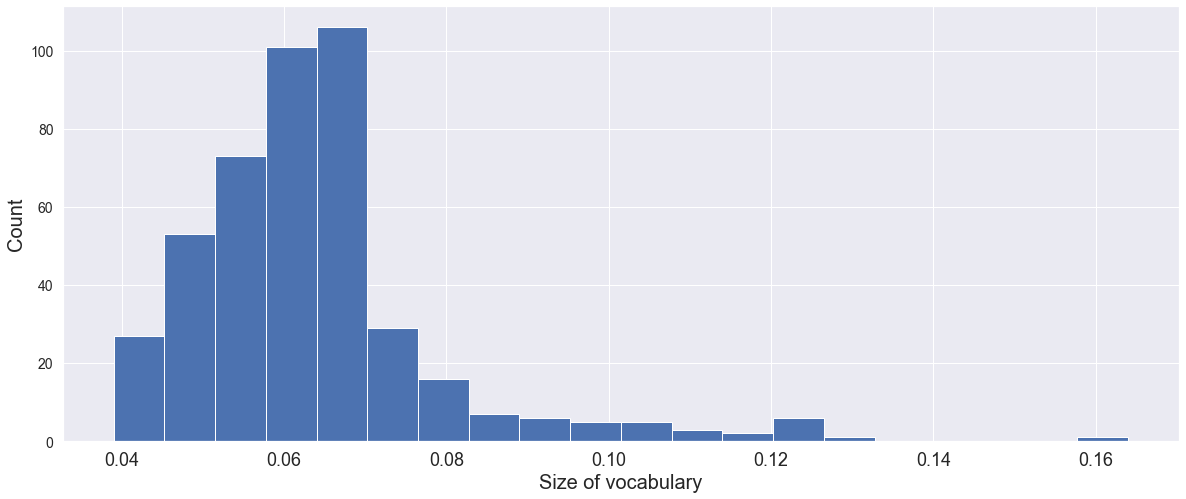

In [110]:
# Plot histogram of size of vocabulary
ax = speech_df['vocab'].hist(bins=20);
ax.set_title('',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_xlabel('Size of vocabulary',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=14);